In [1]:
from transformers import OneFormerProcessor, OneFormerModel, TrainingArguments, Trainer
from PIL import Image
import requests
import torch

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# creare a OneFormer config
# initialize the model with the config
# train the model with a custom dataset -> Train class
# check model predictions

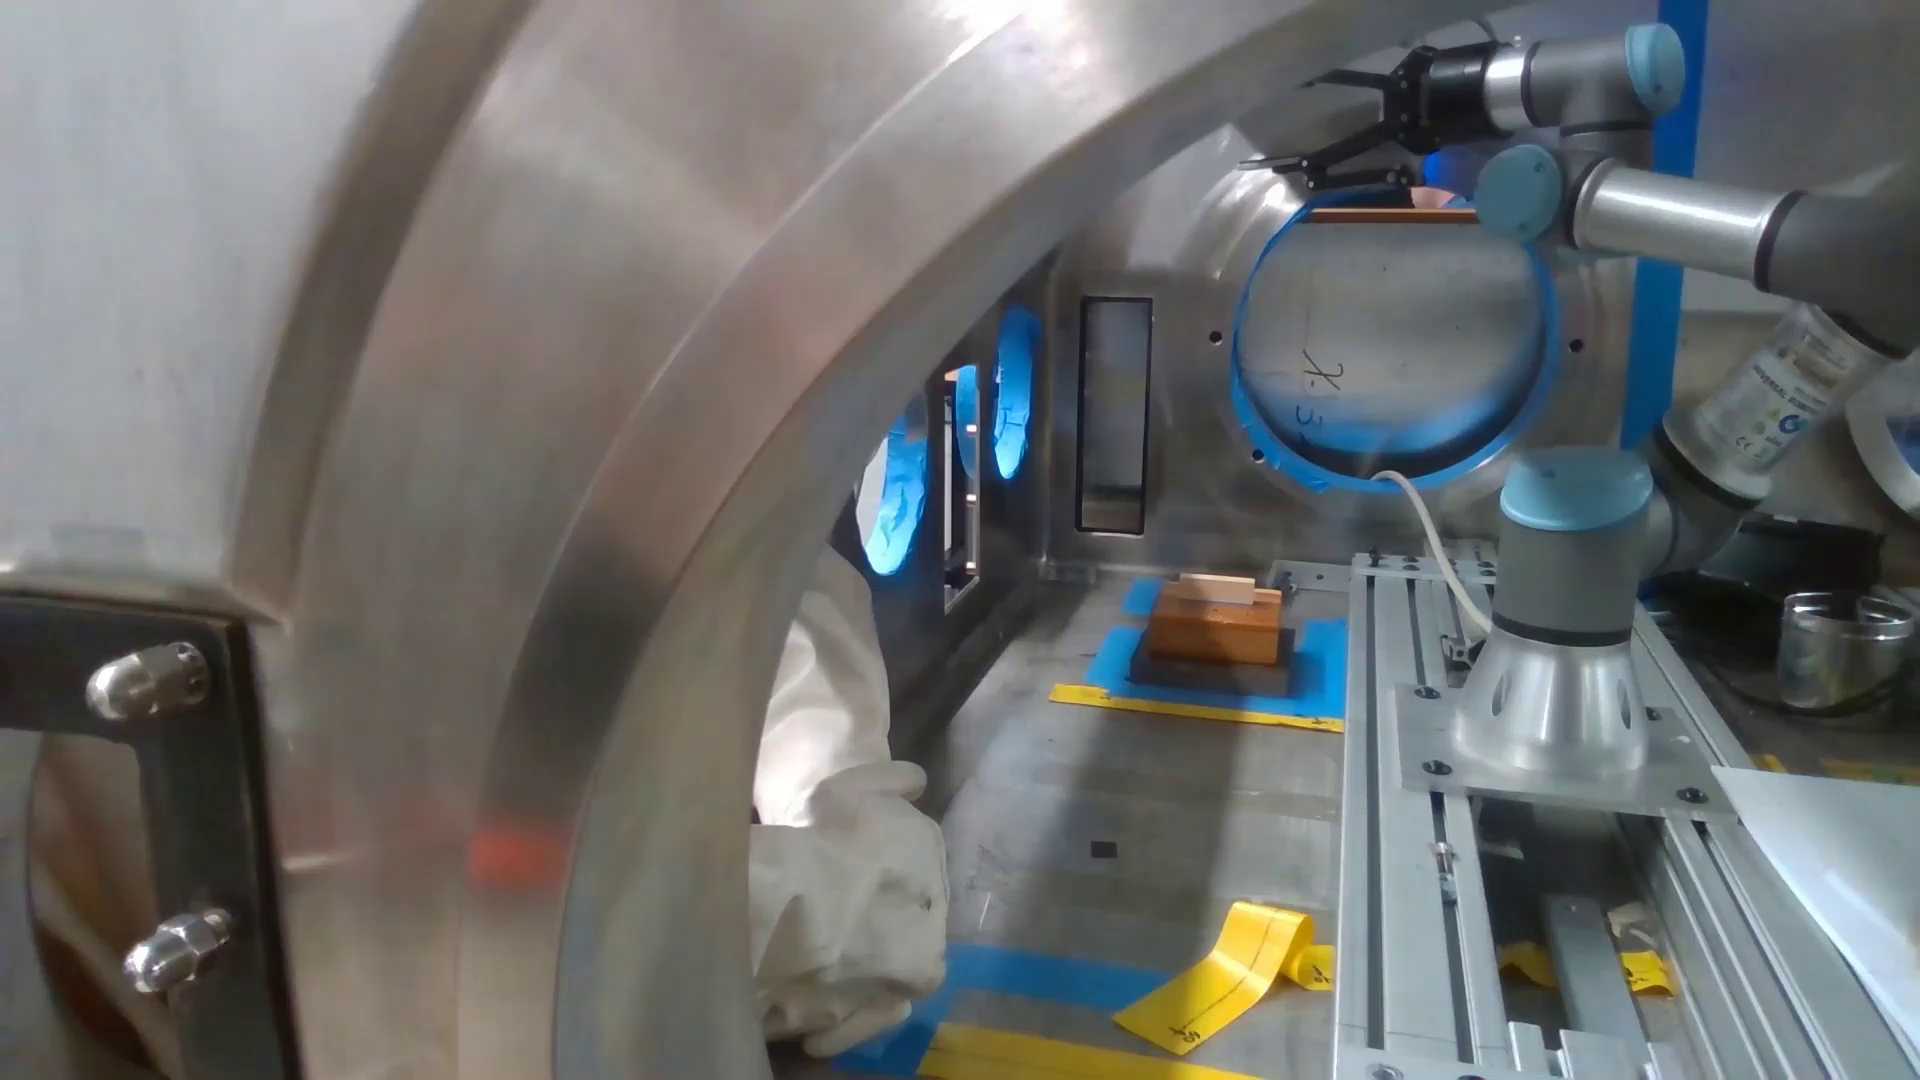

In [2]:
image = Image.open("J_GL_0.0.png")
image

In [3]:
processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", ignore_mismatched_sizes=True) #ignore mismatched size
model = OneFormerModel.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", ignore_mismatched_sizes=True)

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\transformers\models\oneformer\image_processing_oneformer.py:417: FutureWarning: The `reduce_labels` argument is deprecated and will be removed in v4.27. Please use `do_reduce_labels` instead.
  warnings.warn(
Some weights of the model checkpoint at shi-labs/oneformer_ade20k_swin_tiny were not used when initializing OneFormerModel: ['criterion.empty_weight', 'criterion.logit_scale']
- This IS expected if you are initializing OneFormerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing OneFormerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
model.config

OneFormerConfig {
  "_commit_hash": "05f2812b1eccf9909b3897777450f8d68148cafc",
  "_name_or_path": "shi-labs/oneformer_ade20k_swin_tiny",
  "architectures": [
    "OneFormerForUniversalSegmentation"
  ],
  "backbone_config": {
    "_name_or_path": "",
    "add_cross_attention": false,
    "architectures": [
      "SwinForImageClassification"
    ],
    "attention_probs_dropout_prob": 0.0,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": null,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": null,
    "depths": [
      2,
      2,
      6,
      2
    ],
    "diversity_penalty": 0.0,
    "do_sample": false,
    "drop_path_rate": 0.3,
    "early_stopping": false,
    "embed_dim": 96,
    "encoder_no_repeat_ngram_size": 0,
    "encoder_stride": 32,
    "eos_token_id": null,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bos_token_id": null,
    "forced_eos_token

In [56]:
import numpy as np
image = np.array(image)
image = torch.from_numpy(image)

inputs = processor(image, ["semantic"], return_tensors="pt")
    
device = "cuda"
inputs = inputs.to(device)

with torch.no_grad():
    outputs = model(**inputs)

outputs

OneFormerForUniversalSegmentationOutput(loss=None, class_queries_logits=tensor([[[ 0.2103,  0.7654,  0.8897,  0.7898],
         [ 1.2429,  0.5961,  0.3595, -0.3139],
         [ 0.4189, -0.4470, -0.7632, -0.4249]]], device='cuda:0'), masks_queries_logits=tensor([[[[-24.4529, -28.0001, -28.6546,  ..., -17.6925, -19.1933, -12.0027],
          [-24.3926, -26.1345, -26.1697,  ..., -17.4252, -18.2428, -13.1252],
          [-25.4461, -27.4947, -26.3742,  ..., -15.9889, -17.5130, -12.3887],
          ...,
          [-14.4577, -14.2171, -13.9969,  ..., -23.0546, -20.9341, -15.3571],
          [-14.1766, -14.4087, -14.2039,  ..., -24.9550, -20.9953, -15.2320],
          [-11.8454, -12.9333, -12.9113,  ..., -23.3433, -19.9335, -12.9264]],

         [[-16.8994, -20.9887, -21.0977,  ..., -11.2005, -11.3372,  -8.2618],
          [-18.7907, -21.4144, -21.3355,  ..., -11.0357, -10.9669,  -8.9548],
          [-19.2435, -22.1306, -21.5531,  ..., -10.2367, -10.4855,  -8.4899],
          ...,
          [ 

In [57]:
outputs.masks_queries_logits.shape

torch.Size([1, 3, 128, 228])

In [59]:
import numpy as np
outputs.transformer_decoder_mask_predictions.shape, np.array(image).shape

(torch.Size([1, 3, 128, 228]), (1080, 1920, 3))

(128, 228)


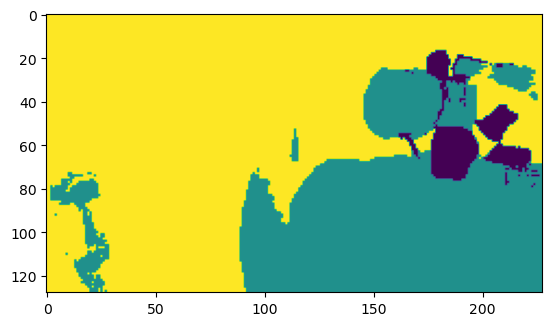

In [60]:
import matplotlib.pyplot as plt

mask_predictions = outputs.transformer_decoder_mask_predictions
# list(mask_predictions.shape)
# outputs.keys()

preds = torch.argmax(mask_predictions, dim=1)

img = preds[0].cpu().numpy()
print(img.shape)
plt.imshow(img)
plt.show()

# Now, Getting Oneformer to Work for Training

In [9]:
from transformers import OneFormerProcessor, OneFormerModel, TrainingArguments, Trainer, OneFormerForUniversalSegmentation
from PIL import Image
import requests
import torch

In [11]:
id2label = {
    0: "background",
    1: "left_hand",
    2: "right_hand"
}

In [53]:
# the following shoudl change the amount of classes outputted by the model
# model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", num_labels=3, id2label=id2label, ignore_mismatched_sizes=True)
model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", id2label=id2label, label2id = {v: k for k, v in id2label.items()},
                                                          num_classes=3, ignore_mismatched_sizes=True, num_queries=3)

Some weights of OneFormerForUniversalSegmentation were not initialized from the model checkpoint at shi-labs/oneformer_ade20k_swin_tiny and are newly initialized because the shapes did not match:
- model.transformer_module.queries_embedder.weight: found shape torch.Size([150, 256]) in the checkpoint and torch.Size([3, 256]) in the model instantiated
- model.transformer_module.decoder.class_embed.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([4, 256]) in the model instantiated
- model.transformer_module.decoder.class_embed.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([4]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
model.config
model.to(device)

OneFormerForUniversalSegmentation(
  (model): OneFormerModel(
    (pixel_level_module): OneFormerPixelLevelModule(
      (encoder): SwinBackbone(
        (embeddings): SwinEmbeddings(
          (patch_embeddings): SwinPatchEmbeddings(
            (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
          )
          (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
        )
        (encoder): SwinEncoder(
          (layers): ModuleList(
            (0): SwinStage(
              (blocks): ModuleList(
                (0-1): 2 x SwinLayer(
                  (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
                  (attention): SwinAttention(
                    (self): SwinSelfAttention(
                      (query): Linear(in_features=96, out_features=96, bias=True)
                      (key): Linear(in_features=96, out_features=96, bias=True)
                      (value): Lin

In [33]:
from transformers import OneFormerImageProcessor, OneFormerConfig
## creating an image processor
processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny",metadata=id2label, num_labels=3, class_names=["background", "left_hand", "right_hand"], do_reduce_labels=True,
                                                                                                                                                          ignore_mismatched_sizes=True) # addded ignore mismatched size

In [34]:
processor

OneFormerProcessor:
- image_processor: OneFormerImageProcessor {
  "_max_size": 2048,
  "class_info_file": "ade20k_panoptic.json",
  "do_normalize": true,
  "do_reduce_labels": true,
  "do_rescale": true,
  "do_resize": true,
  "ignore_index": 255,
  "image_mean": [
    0.48500001430511475,
    0.4560000002384186,
    0.4059999883174896
  ],
  "image_processor_type": "OneFormerImageProcessor",
  "image_std": [
    0.2290000021457672,
    0.2239999920129776,
    0.22499999403953552
  ],
  "metadata": {
    "0": "background",
    "1": "left_hand",
    "2": "right_hand"
  },
  "num_labels": 3,
  "num_text": null,
  "processor_class": "OneFormerProcessor",
  "repo_path": "shi-labs/oneformer_demo",
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 2048,
    "shortest_edge": 512
  }
}

- tokenizer: CLIPTokenizerFast(name_or_path='shi-labs/oneformer_ade20k_swin_tiny', vocab_size=49408, model_max_length=1000000000000000019884624838656, is_fast=True, padd

In [61]:
## use M and Y to switch cells b/w MD and python
## use ESC to move to command mode and Enter to go into edit mode
import torch
from torch.utils.data import Dataset, DataLoader
import sys
import os
# sys.path.append("..")
# print(os.getcwd())
# from dataloader import AssemblyDataset
from hf_dataloader import AssemblyDataset

dataset = AssemblyDataset(

    path_to_labels=['C:\\Users\\itsjo\\Documents\\repos\\assembly_glovebox_dataset\\data\\Labels\\Test_Subject_1\\id\\J\\Top_View'], 
    path_to_images=['C:\\Users\\itsjo\\Documents\\repos\\assembly_glovebox_dataset\\data\\images\\Test_Subject_1\\id\\J\\Top_View'] 
                       )

dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)


In [62]:
import evaluate

metric = evaluate.load("mean_iou")

def compute_metrics(eval_pred):
    with torch.no_grad():
        logits, labels = eval_pred
        logits_tensor = torch.from_numpy(logits)
        logits_tensor = torch.argmax(logits_tensor, dim=1)

        pred_labels = logits_tensor.detach().cpu().numpy()

        metrics = metric.compute(
            predictions = pred_labels,
            references = labels
        )

        return metrics

In [63]:
from transformers import OneFormerConfig, OneFormerImageProcessor

In [64]:
num_epochs = 10
num_training_steps = num_epochs * dataset.__len__()

In [65]:
from tqdm import tqdm
import torch.nn as nn
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=3e-5)

device = "cuda"

model = model.to(device)

loss_fn = nn.CrossEntropyLoss()

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [10]:
segmentation_maps = torch.randint(0, 2, (128, 228), dtype=torch.long)

In [11]:
segmentation_maps.shape

torch.Size([128, 228])

In [ ]:

model.train()

for epoch in range(num_epochs):
    for index, batch in tqdm(enumerate(dataloader)):
        print(f"the index is {index}")
        x, y = batch
        inputs = processor(x, ["semantic"],  return_tensors="pt")
        inputs = inputs.to(device)
        y = y.to(device)

        # this expects masks to have shape [batch, h, w], rn its just [h, w]
        # outputs = model(**inputs, class_labels=torch.tensor([0, 1, 2]), mask_labels=y[0])
        outputs = model(**inputs)


        # CHECK OUT USING CLASS_LABELS AND MASK_LABELS TO SPECIFY OUTPUT IN THE HUGGINGFACE DOCUMENTATION
        # use this blog = https://huggingface.co/blog/mask2former
        # use this colab notebook - https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/MaskFormer/Fine-tuning/Fine_tuning_MaskFormerForInstanceSegmentation_on_semantic_sidewalk.ipynb#scrollTo=tXCWTfTbz5Wu
        # ^ see how they computed loss straight from the output and applied

        # here is how they developed the tokenizer - https://github.com/huggingface/transformers/blob/v4.30.0/src/transformers/models/oneformer/convert_to_hf_oneformer.py#L225
        
        target_size = [(y.shape[1], y.shape[2])] * y.shape[0]

        
        loss_fn = nn.CrossEntropyLoss()
        y = y.to(device)

        print(f"ouputs is {outputs.transformer_decoder_mask_predictions.device}")
        print(f"y is {y.long().device}")

        loss = loss_fn(outputs.transformer_decoder_mask_predictions, y.long())
        
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        

In [13]:
with torch.no_grad():
    torch.cuda.empty_cache()

In [14]:
y.shape

torch.Size([1, 128, 228])

In [15]:
outputs.masks_queries_logits.shape

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 outputs.masks_queries_logits.shape                                                           │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'outputs' is not defined

In [16]:
prediction_size = [(y.shape[1], y.shape[2])] * y.shape[0]

In [17]:
outputs.masks_queries_logits.shape

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 outputs.masks_queries_logits.shape                                                           │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'outputs' is not defined

# Inference

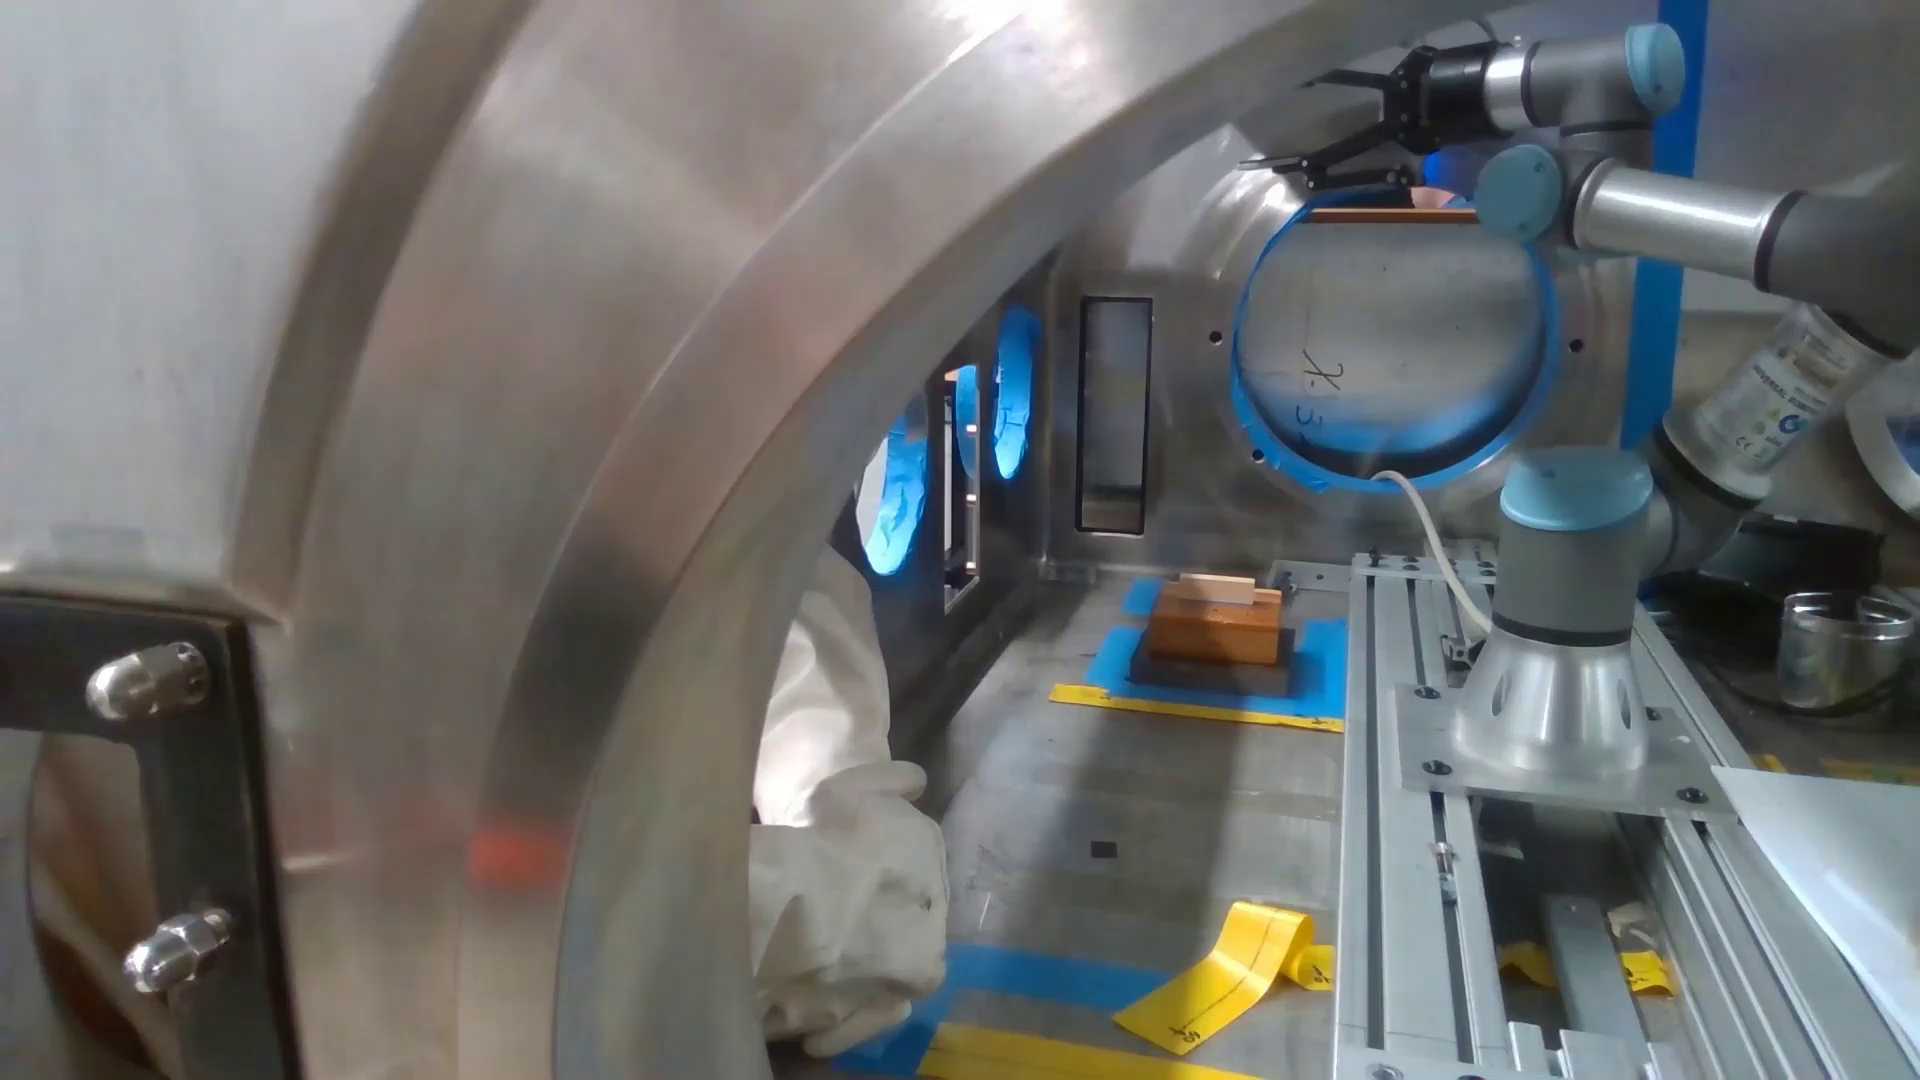

In [67]:
image = Image.open("J_GL_0.0.png")
image

In [68]:
semantic_inputs = processor(images=image, task_inputs=["semantic"], return_tensors="pt")
for k,v in semantic_inputs.items():
  print(k,v.shape)

pixel_values torch.Size([1, 3, 512, 910])
pixel_mask torch.Size([1, 512, 910])
task_inputs torch.Size([1, 77])


In [70]:
# forward pass
model.eval()
# model.to(device="cpu")
semantic_inputs.to(device)
with torch.no_grad():
  outputs = model(**semantic_inputs)

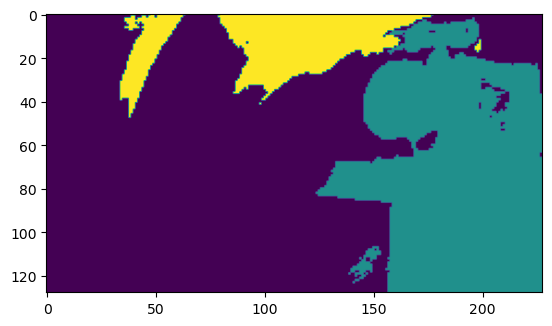

In [79]:
torch.unique(outputs.transformer_decoder_mask_predictions)
a = torch.argmax(outputs.transformer_decoder_mask_predictions, dim=1)

plt.imshow(a[0].cpu())

In [71]:
target_size = [(128, 228)]
semantic_segmentation = processor.post_process_semantic_segmentation(outputs, target_sizes=target_size)[0]
semantic_segmentation.shape

torch.Size([128, 228])

tensor([0], device='cuda:0')

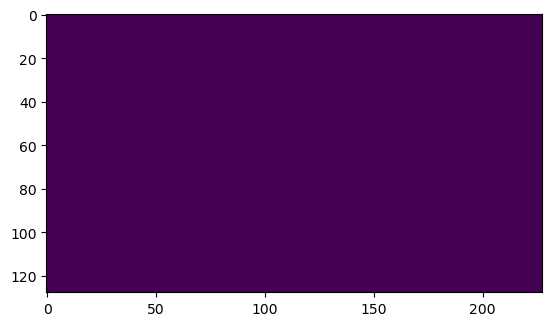

In [73]:
plt.imshow(semantic_segmentation.cpu())
torch.unique(semantic_segmentation)

In [23]:
"""code if you are using the raw outputs from the model instead, and not doing post processing"""
# import matplotlib.pyplot as plt

# mask_predictions = outputs.transformer_decoder_mask_predictions
# # list(mask_predictions.shape)
# # outputs.keys()

# preds = torch.argmax(mask_predictions, dim=1)

# img = preds[0].cpu().numpy()
# print(img.shape)
# plt.imshow(img)
# plt.show()

'code if you are using the raw outputs from the model instead, and not doing post processing'